In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob as glob
import ruptures as rpt
%matplotlib notebook

In [31]:

"""
Read all Mseries data into one big dataframe
Find the path to files in subfolders using os.listdir
"""
def read_M_series_subfolders(path):
    # create a list of file and sub directories 
    # names in the given directory 
    subfolders = os.listdir(path)
    file_list = []
    
    # Iterate over all the entries
    for names in subfolders:
        # Create full path
        fullPath = os.path.join(path, names)
        # If entry is a directory then get the list of files in this directory 
        temp_path = fullPath#for glob
        if os.path.isdir(fullPath):
            file_list = file_list + read_M_series_subfolders(fullPath)   
        else:
            txt_files = glob.glob(path + "/M*.txt")#only read txt files
            if (txt_files != []):
                file_list.append(txt_files)
    return file_list

"""
Function to read M_series data into pandas dataframe
"""
def read_Mseries_data(path):
    drifter_identifyer = path[85:-4]
    print(drifter_identifyer)
    column_names = ['time', 'pressure1', 'temp1', 'pressure2', 'temp2', 'acc_x', 'acc_y', 'acc_z', 'gyro_x',
                    'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z', 'High-g acc_x', 'High-g acc_y', 'High-g acc_z']
    indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    df = pd.read_csv(path, header = 0, names = column_names,usecols = indices)
    df.drop(df[abs(df.pressure1) > 3000].index, inplace = True)
    df.drop(df[abs(df.pressure2) > 3000].index, inplace = True)
    return df

def plot_and_slice(filename,start,stop):
    df = read_Mseries_data(filename)
    df.drop(df[abs(df.pressure1) > 3000].index, inplace = True)
    df.drop(df[abs(df.pressure2) > 3000].index, inplace = True)
    plt.plot(df.pressure1[start:stop])
    plt.plot(df.pressure2[start:stop])
    plt.grid()
    plt.show()

"""Concatonate all M_series files into one big fat dataframe"""
def Concatonate_M_Series(all_files):
    li = []
    for i in range(len(all_files)):
        for j in range(len(all_files[i])):
            if (i == 37 and j ==2):#there is a problem with reading this file
                break
            else:
                df = read_Mseries_data(all_files[i][j])
                li.append(df)
    full_dataset = pd.concat(li, axis=0, ignore_index=True)
    return full_dataset

In [32]:
"""
Read all Bseries data into one big dataframe
Find the path to files in subfolders using os.listdir
"""
def read_B_series_subfolders(path):
    # create a list of file and sub directories 
    # names in the given directory 
    subfolders = os.listdir(path)
    file_list = []
    # Iterate over all the entries
    for names in subfolders:
        # Create full path
        fullPath = os.path.join(path, names)
        # If entry is a directory then get the list of files in this directory 
        temp_path = fullPath#for glob
        if os.path.isdir(fullPath):
            file_list = file_list + read_B_series_subfolders(fullPath)   
        else:
            txt_files = glob.glob(path + "/*.csv")#only read txt files
            if (txt_files != []):
                file_list.append(txt_files)
    return file_list

def read_Bseries_data(path):
    drifter_identifyer = path[85:-4]
    print(drifter_identifyer)
    #column_names = ['time', 'pressure1', 'temp1', 'pressure2', 'temp2',"pressure3","temp3", 'E_x', 'E_y', 'E_z', 'W_w','Q_y', 'Q_z', 'M_x', 'M_y', 'M_z', 'AX_earth', 'AY_earth', 'AZ_earth',"RX","RY","RZ","CSM","CSA","CSR","CSTOT"]
    #indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    df = pd.read_csv(path)
    df.drop(df[abs(df["PL [hPa]"]) > 3000].index, inplace = True)
    df.drop(df[abs(df["PC [hPa]"]) > 3000].index, inplace = True)
    df.drop(df[abs(df["PR [hPa]"]) > 3000].index, inplace = True)
    return df

In [91]:
"""read all filenames from folder system"""
path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel"#common path
filenames = np.array(read_M_series_subfolders(path),dtype=object)
filenames = np.unique(filenames)#remove duplicate files
#M_series_df = Concatonate_M_Series(filenames)


"""Read all B series filnames"""
filenames_B = np.array(read_B_series_subfolders(path),dtype=object)
filenames_B = np.unique(filenames_B)#remove duplicate files

for i in range(len(filenames)):
    for j in range(len(filenames[i])):
        print(i, " ",j," ",filenames[i][j])

0   0   /Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel/13072021/M13/M130101000000.txt
0   1   /Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel/13072021/M13/M130713150904.txt
0   2   /Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel/13072021/M13/M130713164637.txt
0   3   /Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel/13072021/M13/M130713081527.txt
0   4   /Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel/13072021/M13/M130713160520.txt
0   5   /Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel/13072021/M13/M130713081716.txt
0   6   /Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel/13072021/M13/M130713161257.txt
1   0   /Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel/13072021/M14/M140713160508.txt
1   1   

# Data processing M-Series
Here the data is cut so that periods where the drifters were lying still are cut from the data sets. This is done by manual inspection of the pressure data.

## Problematic files:

### 13072021
all files on 13072021/M13 look strange

Possibly got stuck during deployment: 13072021/M15/M150713150855

Very large negative pressure values on: 13072021/M16/M160713151126

Possibly stuck: 13072021/M16/M160713160519

Probably not deployed: 13072021/M16/M160101000000

Strange readings: 13072021/M17/M170713170339
probably stuck: 13072021/M17/M170713151049
probably stuck: 13072021/M17/M170713160406

Looks weird: 13072021/M18/M180713164623

Only one file with weird data all others are empty: 13072021/M19

All m20 files except : 13072021/M20/M200713151908 are weird

Only m21 usable file: 13072021/M21/M210713151106

No usable files 13072021/M22

### 15072021

Not usable: 15072021/M14/M140715161730

Drifter possibly ran out of battery in middle of run: 15072021/M16/M160715104407

Left and right pressure identical. 15072021/M17/M170715161755, 15072021/M17/M170715104318

No data 15072021/M19/M190715161925

Unusable: 15072021/M20/M200715104437

End of data might be missing: 15072021/M22/M220715104430

### 17072021

Unusable: 17072021/M02/M020101000000

Stuck: 17072021/M04/M040717135101

Incomplete data, probably stuck: 17072021/M07/M07-0717142806

Useless: 17072021/M10/M100717142709

Useless: 17072021/M10/M100717135525

weird drift, probably not deployed: 17072021/M23/M23-0715224431

probably not deployed: 17072021/M23/M23-0717073558

weird drift and big spikes: 17072021/M23/M23-0716213517

### 18072021

incomplete 18072021/M03/M030718173700

Not sure if it was deployed or not, missing endpoints 18072021/M03/M030101000000

Not deployed 18072021/M03/M030718145845

Not deployed 18072021/M03/M030718144901

Possibly stuck in beginning: 18072021/M04/M040718173701

Incomplete: 18072021/M07/M07-0718173651

Possibly usable, but weird: 18072021/M07/M07-0718144919


all files empty 18072021/M14

In [34]:
"""Manually go trough every file to remove time when drifters are logging but stationary"""

"""13072021/M13"""
"""plot_and_slice(filenames[0][0],0,-1)#all files on 13072021/M13 look strange
plot_and_slice(filenames[0][1],0,-1)
plot_and_slice(filenames[0][2],0,-1)
plot_and_slice(filenames[0][3],0,-1)
plot_and_slice(filenames[0][4],0,-1)
plot_and_slice(filenames[0][5],0,-1)
plot_and_slice(filenames[0][6],0,-1)"""

"""13072021/M14"""
"""plot_and_slice(filenames[1][0],49900,70500)
plot_and_slice(filenames[1][1],20500,40700)"""

"""13072021/M15"""
"""plot_and_slice(filenames[2][0],44000,79000)
plot_and_slice(filenames[2][1],44700,64300)"""


"""13072021/M16"""
"""#plot_and_slice(filenames[3][0],17500,20000)#strange pressure readings
plot_and_slice(filenames[3][1],56000,84000)
plot_and_slice(filenames[3][2],0,-1)"""

"""13072021/M17"""
"""plot_and_slice(filenames[4][0],22500,80300)#stuck
plot_and_slice(filenames[4][1],0,-1)#strange readings
plot_and_slice(filenames[4][2],98000,165000)#stuck"""

"""13072021/M18"""
"""plot_and_slice(filenames[5][0],61500,81000)
plot_and_slice(filenames[5][1],0,-1)#looks weird
plot_and_slice(filenames[5][2],25900,43500)"""

"""13072021/M19"""
#all m19 files look weird on this day
#plot_and_slice(filenames[6][0],0,-1)
#plot_and_slice(filenames[6][1],0,-1)
#plot_and_slice(filenames[6][2],0,-1)
#plot_and_slice(filenames[6][3],0,-1)
#plot_and_slice(filenames[6][4],0,-1)
#plot_and_slice(filenames[6][5],0,-1)
#plot_and_slice(filenames[6][6],0,-1)
#plot_and_slice(filenames[6][7],0,-1)
#plot_and_slice(filenames[6][8],0,-1)
#plot_and_slice(filenames[6][9],0,-1)

"""13072021/M20/M200713151908"""
"""plot_and_slice(filenames[7][0],5900,-1)
#plot_and_slice(filenames[7][1],0,-1)
#plot_and_slice(filenames[7][2],0,-1)
#plot_and_slice(filenames[7][3],0,-1)
#plot_and_slice(filenames[7][4],0,-1)
#plot_and_slice(filenames[7][5],0,-1)
#plot_and_slice(filenames[7][6],0,-1)
#plot_and_slice(filenames[8][0],0,-1)"""

"""13072021/M21"""
"""#plot_and_slice(filenames[8][0],0,-1)#not usable
plot_and_slice(filenames[8][1],32300,50000)
#plot_and_slice(filenames[8][2],0,-1)#not usable"""

"""13072021/M22"""
#plot_and_slice(filenames[9][0],0,-1)
#plot_and_slice(filenames[9][1],0,-1)
#plot_and_slice(filenames[9][2],0,-1)
#plot_and_slice(filenames[9][3],0,-1)
#plot_and_slice(filenames[9][4],0,-1)
#plot_and_slice(filenames[9][5],0,-1)

"""15072021/M09"""
"""plot_and_slice(filenames[10][0],49500,70500)
plot_and_slice(filenames[10][1],12900,32500)"""

"""15072021/M14"""
"""plot_and_slice(filenames[11][0],21700,41500)
#plot_and_slice(filenames[11][1],0,-1)#not usable"""


"""15072021/M15"""
"""plot_and_slice(filenames[12][0],18000,37500)
plot_and_slice(filenames[12][1],15900,36600)"""

"""15072021/M16"""
"""plot_and_slice(filenames[13][0],21400,41200)
plot_and_slice(filenames[13][1],14500,-1)#possibly ran out of battery"""

plt.rcParams["figure.figsize"] = (15,3)

"""15072021/M17"""
"""plot_and_slice(filenames[14][0],22500,62600)#left and right pressure sensor are more or less identical
plot_and_slice(filenames[14][1],20000,106000)#left and right pressure sensor are more or less identical"""
#38
"""15072021/M18"""
"""plot_and_slice(filenames[15][0],22000,42000)
plot_and_slice(filenames[15][1],20500,56000)"""

"""15072021/M19"""
"""#plot_and_slice(filenames[16][0],0,-1)#no data
plot_and_slice(filenames[16][1],22600,41800)"""

"""15072021/M20"""
"""#plot_and_slice(filenames[17][0],0,-1)#unusable"""

"""15072021/M21"""
"""plot_and_slice(filenames[18][0],29900,48900)"""

"""15072021/M22"""
"""plot_and_slice(filenames[19][0],31400,-1)#part of data missing?"""

"""17072021/M02"""
"""#plot_and_slice(filenames[20][0],0,-1)#unsusable"""

"""17072021/M03"""
"""plot_and_slice(filenames[21][0],19500,37590)"""

"""17072021/M04"""
"""plot_and_slice(filenames[22][0],30400,52700)#stuck"""

"""17072021/M05"""
"""plot_and_slice(filenames[23][0],25950,44200)# P1 and P2 identical"""

"""17072021/M07"""
"""plot_and_slice(filenames[24][0],1070,4920)#incomplete dataset"""

"""17072021/M08"""
"""plot_and_slice(filenames[25][0],26650,45000)"""

"""17072021/M09"""
"""plot_and_slice(filenames[26][0],28700,46700)"""
"""17072021/M10"""
"""#plot_and_slice(filenames[27][0],0,-1)#ueseless/not deployed
#plot_and_slice(filenames[27][1],0,-1)#useless/strange readings"""

"""17072021/M23"""
"""#plot_and_slice(filenames[28][0],0,-1)#weir drift
#plot_and_slice(filenames[28][1],0,-1)#eird
#plot_and_slice(filenames[28][2],0,-1)#weird
plot_and_slice(filenames[28][3],33450,51750)"""

"""17072021/M24"""
"""plot_and_slice(filenames[29][0],34850,53000)"""

"""18072021/M03"""
"""plot_and_slice(filenames[30][0],25500,-1)#incomplete
plot_and_slice(filenames[30][1],0,-1)#not sure if deployed or not missing start and end probably stuck
#plot_and_slice(filenames[30][2],0,-1)#not deployed
#plot_and_slice(filenames[30][3],0,-1)not deployed"""

"""18072021/M04"""
"""plot_and_slice(filenames[31][0],26750,82300)#possibly stuck
plot_and_slice(filenames[31][1],15300,41000)"""

"""18072021/M07"""
"""plot_and_slice(filenames[32][0],28860,-1)#incomplete
#plot_and_slice(filenames[32][1],14750,-1)#possibly usable, but weird"""


#plot_and_slice(filenames[33][0],28700,61100)
#plot_and_slice(filenames[33][1],0,-1)


#plot_and_slice(filenames[34][0],0,-1)
#plot_and_slice(filenames[34][1],0,-1)
#plot_and_slice(filenames[34][2],0,-1)
#plot_and_slice(filenames[34][3],0,-1)

#plot_and_slice(filenames[35][0],0,-1)
#plot_and_slice(filenames[35][1],0,-1)

"""18072021/M14"""
"""#plot_and_slice(filenames[36][0],0,-1)
#plot_and_slice(filenames[36][1],0,-1)
#plot_and_slice(filenames[36][2],0,-1)
#plot_and_slice(filenames[36][3],0,-1)
#plot_and_slice(filenames[36][4],0,-1)
#plot_and_slice(filenames[36][5],0,-1)
#plot_and_slice(filenames[36][6],0,-1)
#plot_and_slice(filenames[36][7],0,-1)"""




#plot_and_slice(filenames[37][0],0,-1)
#plot_and_slice(filenames[37][1],0,-1)


#plot_and_slice(filenames[38][0],0,-1)
#plot_and_slice(filenames[38][1],0,-1)
#plot_and_slice(filenames[38][2],0,-1)

#plot_and_slice(filenames[39][0],0,-1)
#plot_and_slice(filenames[39][1],0,-1)
#plot_and_slice(filenames[39][2],0,-1)







'#plot_and_slice(filenames[36][0],0,-1)\n#plot_and_slice(filenames[36][1],0,-1)\n#plot_and_slice(filenames[36][2],0,-1)\n#plot_and_slice(filenames[36][3],0,-1)\n#plot_and_slice(filenames[36][4],0,-1)\n#plot_and_slice(filenames[36][5],0,-1)\n#plot_and_slice(filenames[36][6],0,-1)\n#plot_and_slice(filenames[36][7],0,-1)'

13072021/M13/M130101000000


<IPython.core.display.Javascript object>


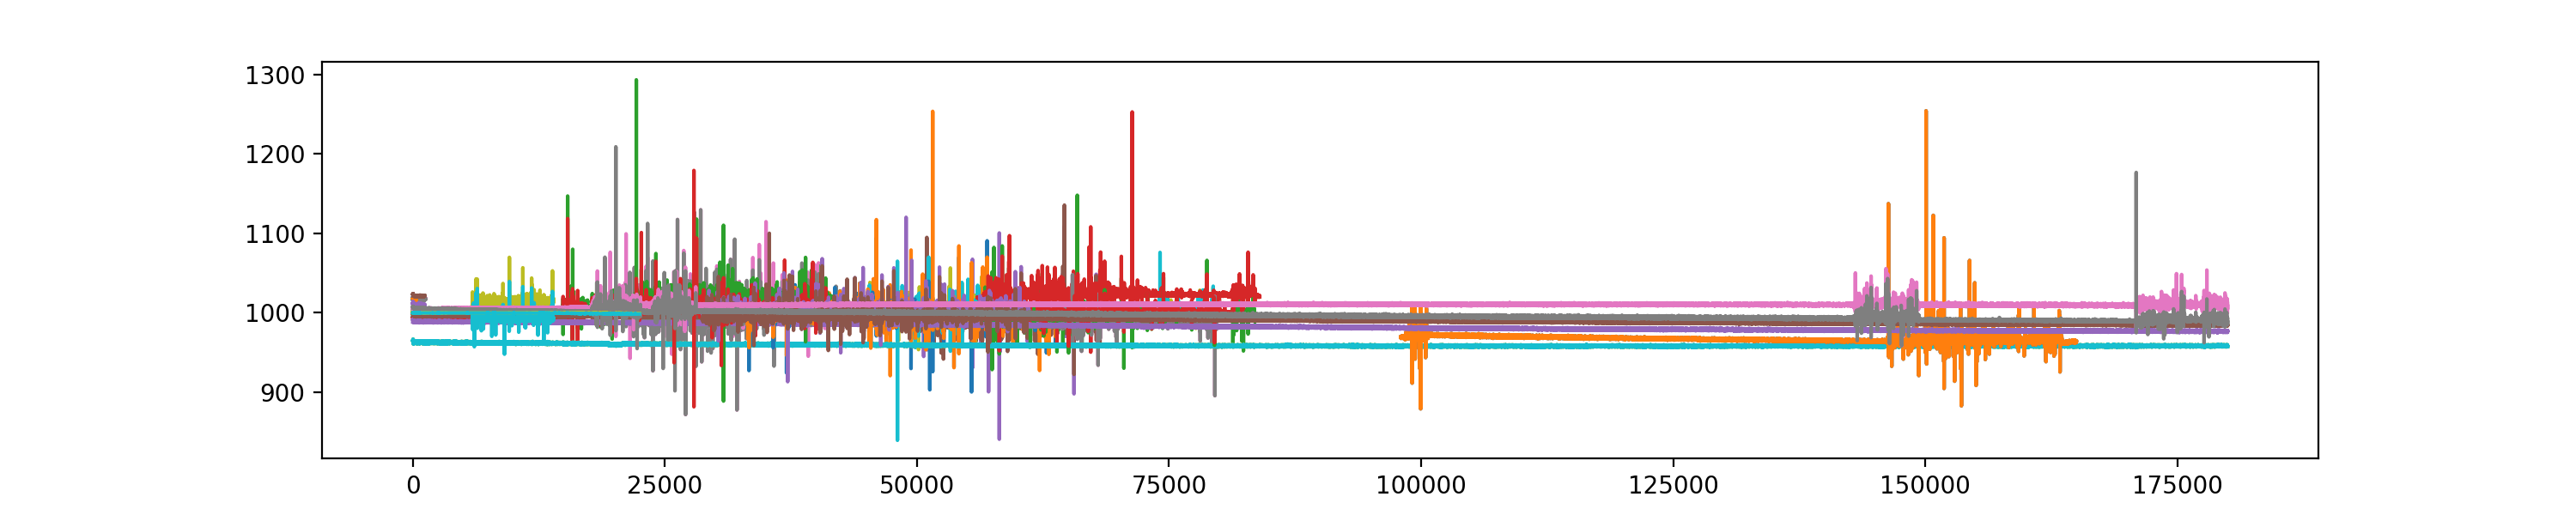

13072021/M13/M130713150904
13072021/M13/M130713164637
13072021/M13/M130713081527
13072021/M13/M130713160520
13072021/M13/M130713081716
13072021/M13/M130713161257
13072021/M14/M140713160508
13072021/M14/M140713150818
13072021/M15/M150713150855
13072021/M15/M150713160801
13072021/M16/M160713160519
13072021/M16/M160101000000
13072021/M17/M170713151049
13072021/M17/M170713170339
13072021/M17/M170713160406
13072021/M18/M180713160427
13072021/M18/M180713164623
13072021/M18/M180713151102
13072021/M20/M200713151908
13072021/M21/M210713151106
15072021/M14/M140715104256
18072021/M08/M08-0718173755
18072021/M08/M08-0718144907


'#plot_and_slice(filenames[36][0],0,-1)\n#plot_and_slice(filenames[36][1],0,-1)\n#plot_and_slice(filenames[36][2],0,-1)\n#plot_and_slice(filenames[36][3],0,-1)\n#plot_and_slice(filenames[36][4],0,-1)\n#plot_and_slice(filenames[36][5],0,-1)\n#plot_and_slice(filenames[36][6],0,-1)\n#plot_and_slice(filenames[36][7],0,-1)'

In [35]:
"""Manually go trough every file to remove time when drifters are logging but stationary"""

"""13072021/M13"""
plot_and_slice(filenames[0][0],0,-1)#all files on 13072021/M13 look strange
plot_and_slice(filenames[0][1],0,-1)
plot_and_slice(filenames[0][2],0,-1)
plot_and_slice(filenames[0][3],0,-1)
plot_and_slice(filenames[0][4],0,-1)
plot_and_slice(filenames[0][5],0,-1)
plot_and_slice(filenames[0][6],0,-1)

"""13072021/M14"""
plot_and_slice(filenames[1][0],49900,70500)
plot_and_slice(filenames[1][1],20500,40700)

"""13072021/M15"""
plot_and_slice(filenames[2][0],44000,79000)
plot_and_slice(filenames[2][1],44700,64300)


"""13072021/M16"""
#plot_and_slice(filenames[3][0],17500,20000)#strange pressure readings
plot_and_slice(filenames[3][1],56000,84000)
plot_and_slice(filenames[3][2],0,-1)

"""13072021/M17"""
plot_and_slice(filenames[4][0],22500,80300)#stuck
plot_and_slice(filenames[4][1],0,-1)#strange readings
plot_and_slice(filenames[4][2],98000,165000)#stuck

"""13072021/M18"""
plot_and_slice(filenames[5][0],61500,81000)
plot_and_slice(filenames[5][1],0,-1)#looks weird
plot_and_slice(filenames[5][2],25900,43500)

"""13072021/M19"""
#all m19 files look weird on this day
#plot_and_slice(filenames[6][0],0,-1)
#plot_and_slice(filenames[6][1],0,-1)
#plot_and_slice(filenames[6][2],0,-1)
#plot_and_slice(filenames[6][3],0,-1)
#plot_and_slice(filenames[6][4],0,-1)
#plot_and_slice(filenames[6][5],0,-1)
#plot_and_slice(filenames[6][6],0,-1)
#plot_and_slice(filenames[6][7],0,-1)
#plot_and_slice(filenames[6][8],0,-1)
#plot_and_slice(filenames[6][9],0,-1)

"""13072021/M20/M200713151908"""
plot_and_slice(filenames[7][0],5900,-1)
#plot_and_slice(filenames[7][1],0,-1)
#plot_and_slice(filenames[7][2],0,-1)
#plot_and_slice(filenames[7][3],0,-1)
#plot_and_slice(filenames[7][4],0,-1)
#plot_and_slice(filenames[7][5],0,-1)
#plot_and_slice(filenames[7][6],0,-1)
#plot_and_slice(filenames[8][0],0,-1)

"""13072021/M21"""
#plot_and_slice(filenames[8][0],0,-1)#not usable
plot_and_slice(filenames[8][1],32300,50000)
#plot_and_slice(filenames[8][2],0,-1)#not usable

"""13072021/M22"""
#no usable files
#plot_and_slice(filenames[9][0],0,-1)
#plot_and_slice(filenames[9][1],0,-1)
#plot_and_slice(filenames[9][2],0,-1)
#plot_and_slice(filenames[9][3],0,-1)
#plot_and_slice(filenames[9][4],0,-1)
#plot_and_slice(filenames[9][5],0,-1)

"""15072021/M09"""
"""plot_and_slice(filenames[10][0],49500,70500)
plot_and_slice(filenames[10][1],12900,32500)"""

"""15072021/M14"""
plot_and_slice(filenames[11][0],21700,41500)
#plot_and_slice(filenames[11][1],0,-1)#not usable


"""15072021/M15"""
"""plot_and_slice(filenames[12][0],18000,37500)
plot_and_slice(filenames[12][1],15900,36600)"""

"""15072021/M16"""
"""plot_and_slice(filenames[13][0],21400,41200)
plot_and_slice(filenames[13][1],14500,-1)#possibly ran out of battery"""

plt.rcParams["figure.figsize"] = (15,3)

"""15072021/M17"""
"""plot_and_slice(filenames[14][0],22500,62600)#left and right pressure sensor are more or less identical
plot_and_slice(filenames[14][1],20000,106000)#left and right pressure sensor are more or less identical"""
#38
"""15072021/M18"""
"""plot_and_slice(filenames[15][0],22000,42000)
plot_and_slice(filenames[15][1],20500,56000)"""

"""15072021/M19"""
"""#plot_and_slice(filenames[16][0],0,-1)#no data
plot_and_slice(filenames[16][1],22600,41800)"""

"""15072021/M20"""
"""#plot_and_slice(filenames[17][0],0,-1)#unusable"""

"""15072021/M21"""
"""plot_and_slice(filenames[18][0],29900,48900)"""

"""15072021/M22"""
"""plot_and_slice(filenames[19][0],31400,-1)#part of data missing?"""

"""17072021/M02"""
"""#plot_and_slice(filenames[20][0],0,-1)#unsusable"""

"""17072021/M03"""
"""plot_and_slice(filenames[21][0],19500,37590)"""

"""17072021/M04"""
"""plot_and_slice(filenames[22][0],30400,52700)#stuck"""

"""17072021/M05"""
"""plot_and_slice(filenames[23][0],25950,44200)# P1 and P2 identical"""

"""17072021/M07"""
"""plot_and_slice(filenames[24][0],1070,4920)#incomplete dataset"""

"""17072021/M08"""
"""plot_and_slice(filenames[25][0],26650,45000)"""

"""17072021/M09"""
"""plot_and_slice(filenames[26][0],28700,46700)"""
"""17072021/M10"""
"""#plot_and_slice(filenames[27][0],0,-1)#ueseless/not deployed
#plot_and_slice(filenames[27][1],0,-1)#useless/strange readings"""

"""17072021/M23"""
"""#plot_and_slice(filenames[28][0],0,-1)#weir drift
#plot_and_slice(filenames[28][1],0,-1)#eird
#plot_and_slice(filenames[28][2],0,-1)#weird
plot_and_slice(filenames[28][3],33450,51750)"""

"""17072021/M24"""
"""plot_and_slice(filenames[29][0],34850,53000)"""

"""18072021/M03"""
"""plot_and_slice(filenames[30][0],25500,-1)#incomplete
plot_and_slice(filenames[30][1],0,-1)#not sure if deployed or not missing start and end probably stuck
#plot_and_slice(filenames[30][2],0,-1)#not deployed
#plot_and_slice(filenames[30][3],0,-1)not deployed"""

"""18072021/M04"""
"""plot_and_slice(filenames[31][0],26750,82300)#possibly stuck
plot_and_slice(filenames[31][1],15300,41000)"""

"""18072021/M07"""
"""plot_and_slice(filenames[32][0],28860,-1)#incomplete
#plot_and_slice(filenames[32][1],14750,-1)#possibly usable, but weird"""


plot_and_slice(filenames[33][0],28700,61100)
plot_and_slice(filenames[33][1],0,-1)


#plot_and_slice(filenames[34][0],0,-1)
#plot_and_slice(filenames[34][1],0,-1)
#plot_and_slice(filenames[34][2],0,-1)
#plot_and_slice(filenames[34][3],0,-1)

#plot_and_slice(filenames[35][0],0,-1)
#plot_and_slice(filenames[35][1],0,-1)

"""18072021/M14"""
"""#plot_and_slice(filenames[36][0],0,-1)
#plot_and_slice(filenames[36][1],0,-1)
#plot_and_slice(filenames[36][2],0,-1)
#plot_and_slice(filenames[36][3],0,-1)
#plot_and_slice(filenames[36][4],0,-1)
#plot_and_slice(filenames[36][5],0,-1)
#plot_and_slice(filenames[36][6],0,-1)
#plot_and_slice(filenames[36][7],0,-1)"""




#plot_and_slice(filenames[37][0],0,-1)
#plot_and_slice(filenames[37][1],0,-1)


#plot_and_slice(filenames[38][0],0,-1)
#plot_and_slice(filenames[38][1],0,-1)
#plot_and_slice(filenames[38][2],0,-1)

#plot_and_slice(filenames[39][0],0,-1)
#plot_and_slice(filenames[39][1],0,-1)
#plot_and_slice(filenames[39][2],0,-1)

# Data processing B-series data

In [36]:
read_Bseries_data(filenames_B[0][0])["PL [hPa]"].plot()
#read_Bseries_data(filenames_B[0][0])["PC [hPa]"].plot()
read_Bseries_data(filenames_B[0][0])["PR [hPa]"].plot()


13072021/B10/CSV_files/B100713154414
13072021/B10/CSV_files/B100713154414


<AxesSubplot:>

# Ruptures change point detection

Create some data to test different CPD methods

In [92]:
# generate signal
#15.07 2021 A drone was used to follow drifter M09 at 12:59. Filneme for this deployment: M090715104232.txt

def gen_signal(filename):
    ruptures_df = read_Mseries_data(filename)
    ruptures_df_norm = read_Mseries_data(filename)

    ruptures_df_norm["acc_abs"] = np.sqrt(ruptures_df["acc_x"]**2 + ruptures_df["acc_x"]**2 + ruptures_df["acc_x"]**2)
    ruptures_df_norm = (ruptures_df_norm-ruptures_df_norm.min())/(ruptures_df_norm.max()-ruptures_df_norm.min())
    signal_norm = ruptures_df_norm[["pressure1","pressure2","acc_abs"]].to_numpy()

    ruptures_df["acc_abs"] = np.sqrt(ruptures_df["acc_x"]**2 + ruptures_df["acc_x"]**2 + ruptures_df["acc_x"]**2)
    signal = ruptures_df[["pressure1","pressure2","acc_abs"]].to_numpy()
    
    ruptures_df_mean = ruptures_df.rolling(10).mean()
    signal_mean = ruptures_df_mean[["pressure1","pressure2","acc_abs"]].to_numpy()
    
    sigma = signal.std()
    n = len(signal)
    dim = 3

    start_n = 0#49800
    end_n = -1
    time_s = np.linspace(0,n,n)/50#convert to seconds
    
    return signal, signal_norm,signal_mean,n





15072021/M09/M090715104232
15072021/M09/M090715104232


In [94]:
M09_1507,M09_1507_norm,M09_1507_mean,M09_1507_n = gen_signal(filenames[10][0])#deployment filmed by drone
M24_1707,M24_1707_norm,M24_1707_mean,M24_1707_n = gen_signal(filenames[29][0])#deployment filmed by handheld camera

15072021/M09/M090715104232
15072021/M09/M090715104232
17072021/M24/M24-0717135616
17072021/M24/M24-0717135616


# Window-based change point detection
Promising withautoregressive model . Does not classify stuck in different bins
https://centre-borelli.github.io/ruptures-docs/user-guide/detection/window/

<IPython.core.display.Javascript object>


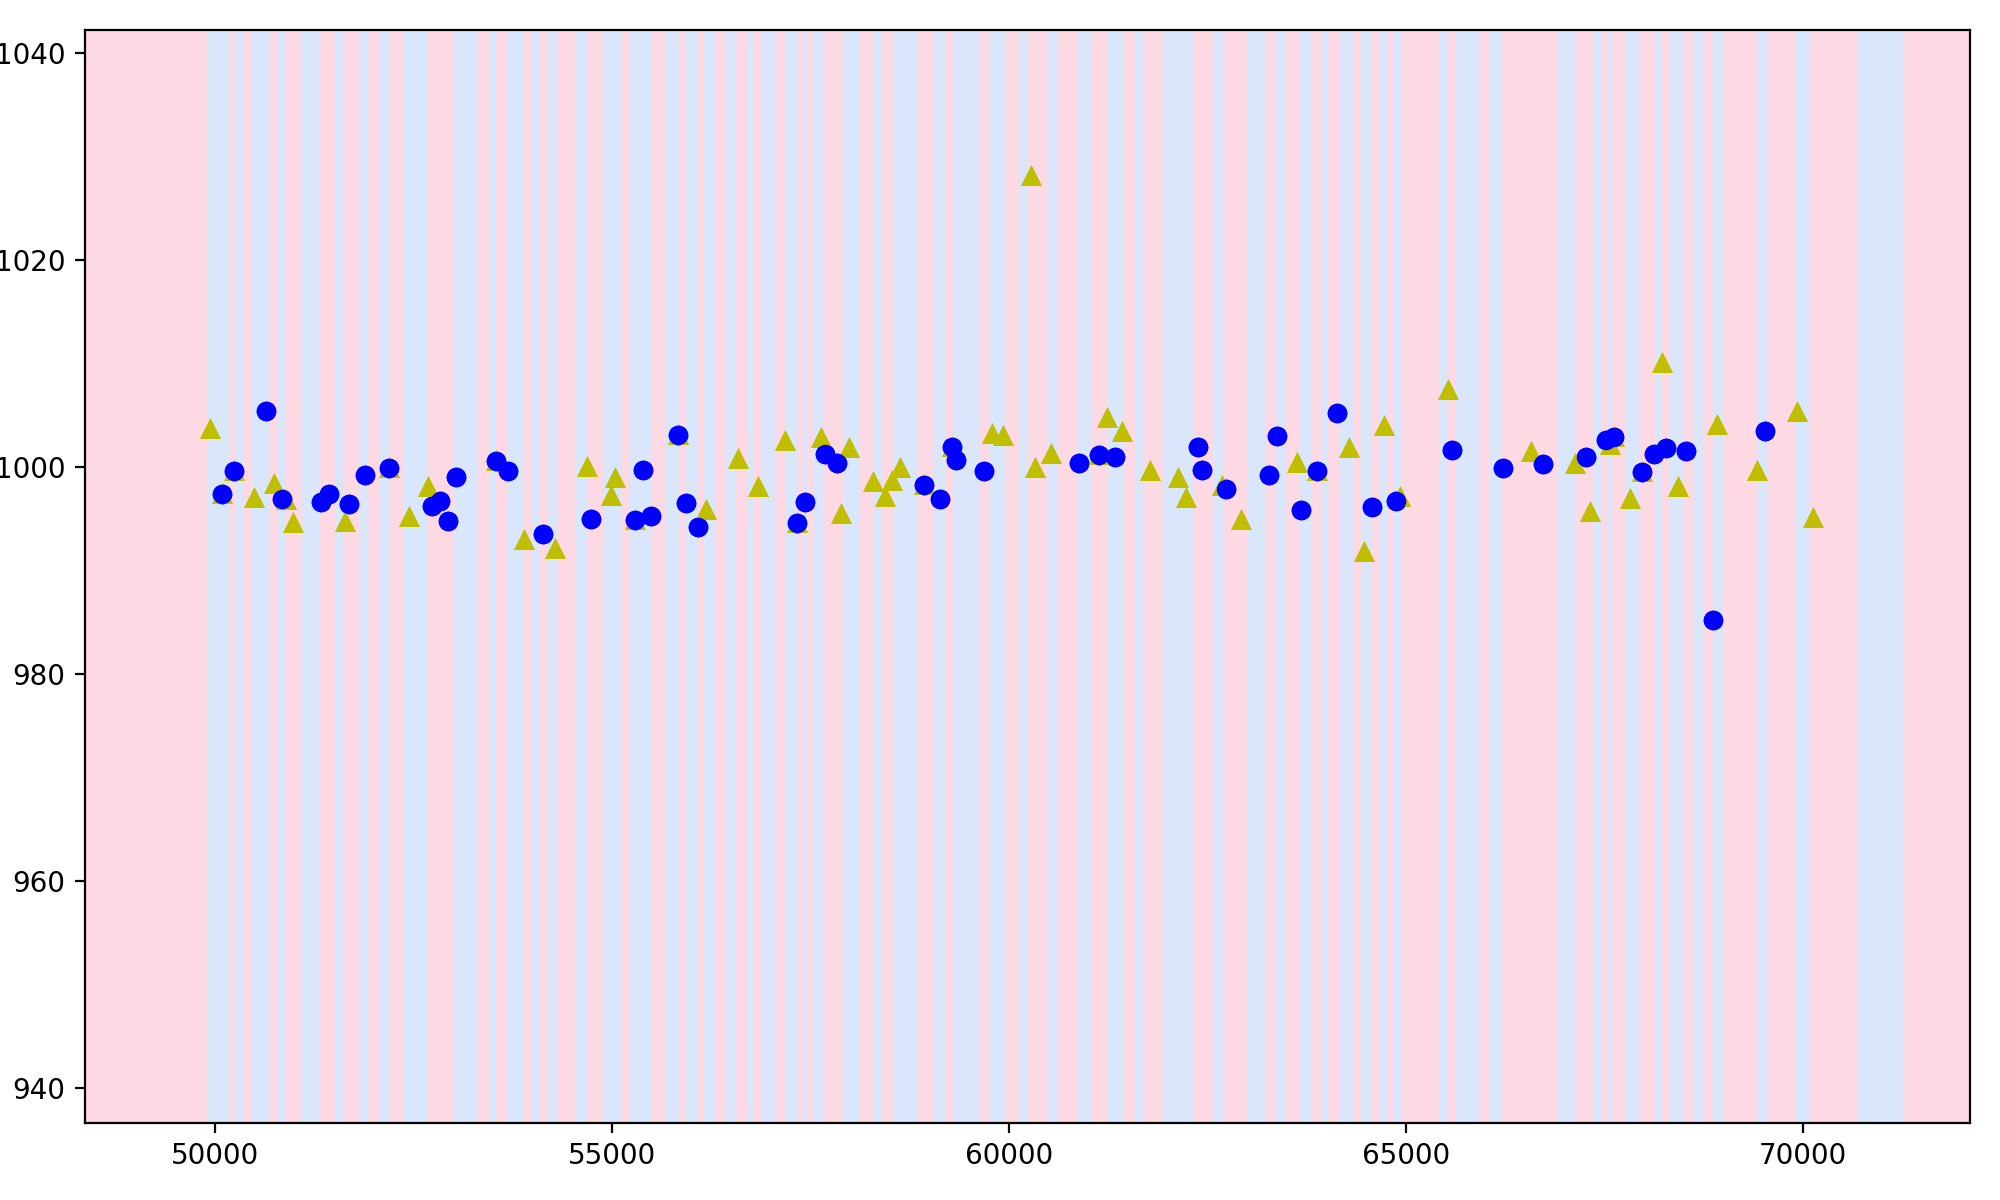

126


In [86]:
def window_cpd(signal,model,width,jump,dim,sigma):
    # change point detection
    model =   model#"ar"
    algo = rpt.Window(model=model, width = width, jump = jump).fit(signal)
    my_bkps = algo.predict(pen=np.log(n) * dim *sigma ** 2)
    rpt.show.display(signal, my_bkps, figsize=(10, 6))
    plt.show()
    print(len(my_bkps))
    return my_bkps

## Plot deployment filmed by drone together with features found by visual inspection

In [95]:
start_n = 49770#49800
end_n = 71700
n = int((end_n-start_n)/7)
time_s = np.linspace(0,end_n-start_n,end_n-start_n)/50#convert to seconds

"""time of Changepoints found in drone video by visual inspection"""
vcp_drone = np.array([0,3,6,11,16,19,21,34,45,50,55,72,79,87,95,101,102,107,118,125,133,138,145,148,154,159,161,167,170,172,174,180,187,197,200,207,208,212,224,226,230,237,244,246,255,260,274,279,287,291,296,300,312,333,344,348,353,354,358,361,366,370,380,390,400,404])
vcp_idx = np.zeros(len(vcp_drone))

"""time of meander bends"""
vcp_meanders = np.array([3,6,14,18,28,30,35,39,45,56,58,60,62,72,75,84,96,107,109,111,118,120,123,148,150,155,158,180,184,187,188,195,219,224,228,249,250,256,267,269,275,279,284,293,299,313,326,336,347,352,354,361,364,367,372,379,392])
vcp_meanders_idx = np.zeros(len(vcp_meanders))

for i in range(len(vcp_drone)):#find indexes in time_s of the features
    vcp_idx[i] = (next(j for j, _ in enumerate(time_s) if np.isclose(_, vcp_drone[i], 0.001)))
    
for i in range(len(vcp_meanders)):
    vcp_meanders_idx[i] = (next(j for j, _ in enumerate(time_s) if np.isclose(_, vcp_meanders[i], 0.001)))



#add some points to align with data
vcp_idx = vcp_idx.astype(int) + start_n + 170
vcp_meanders_idx = vcp_meanders_idx.astype(int) + start_n + 170


<IPython.core.display.Javascript object>


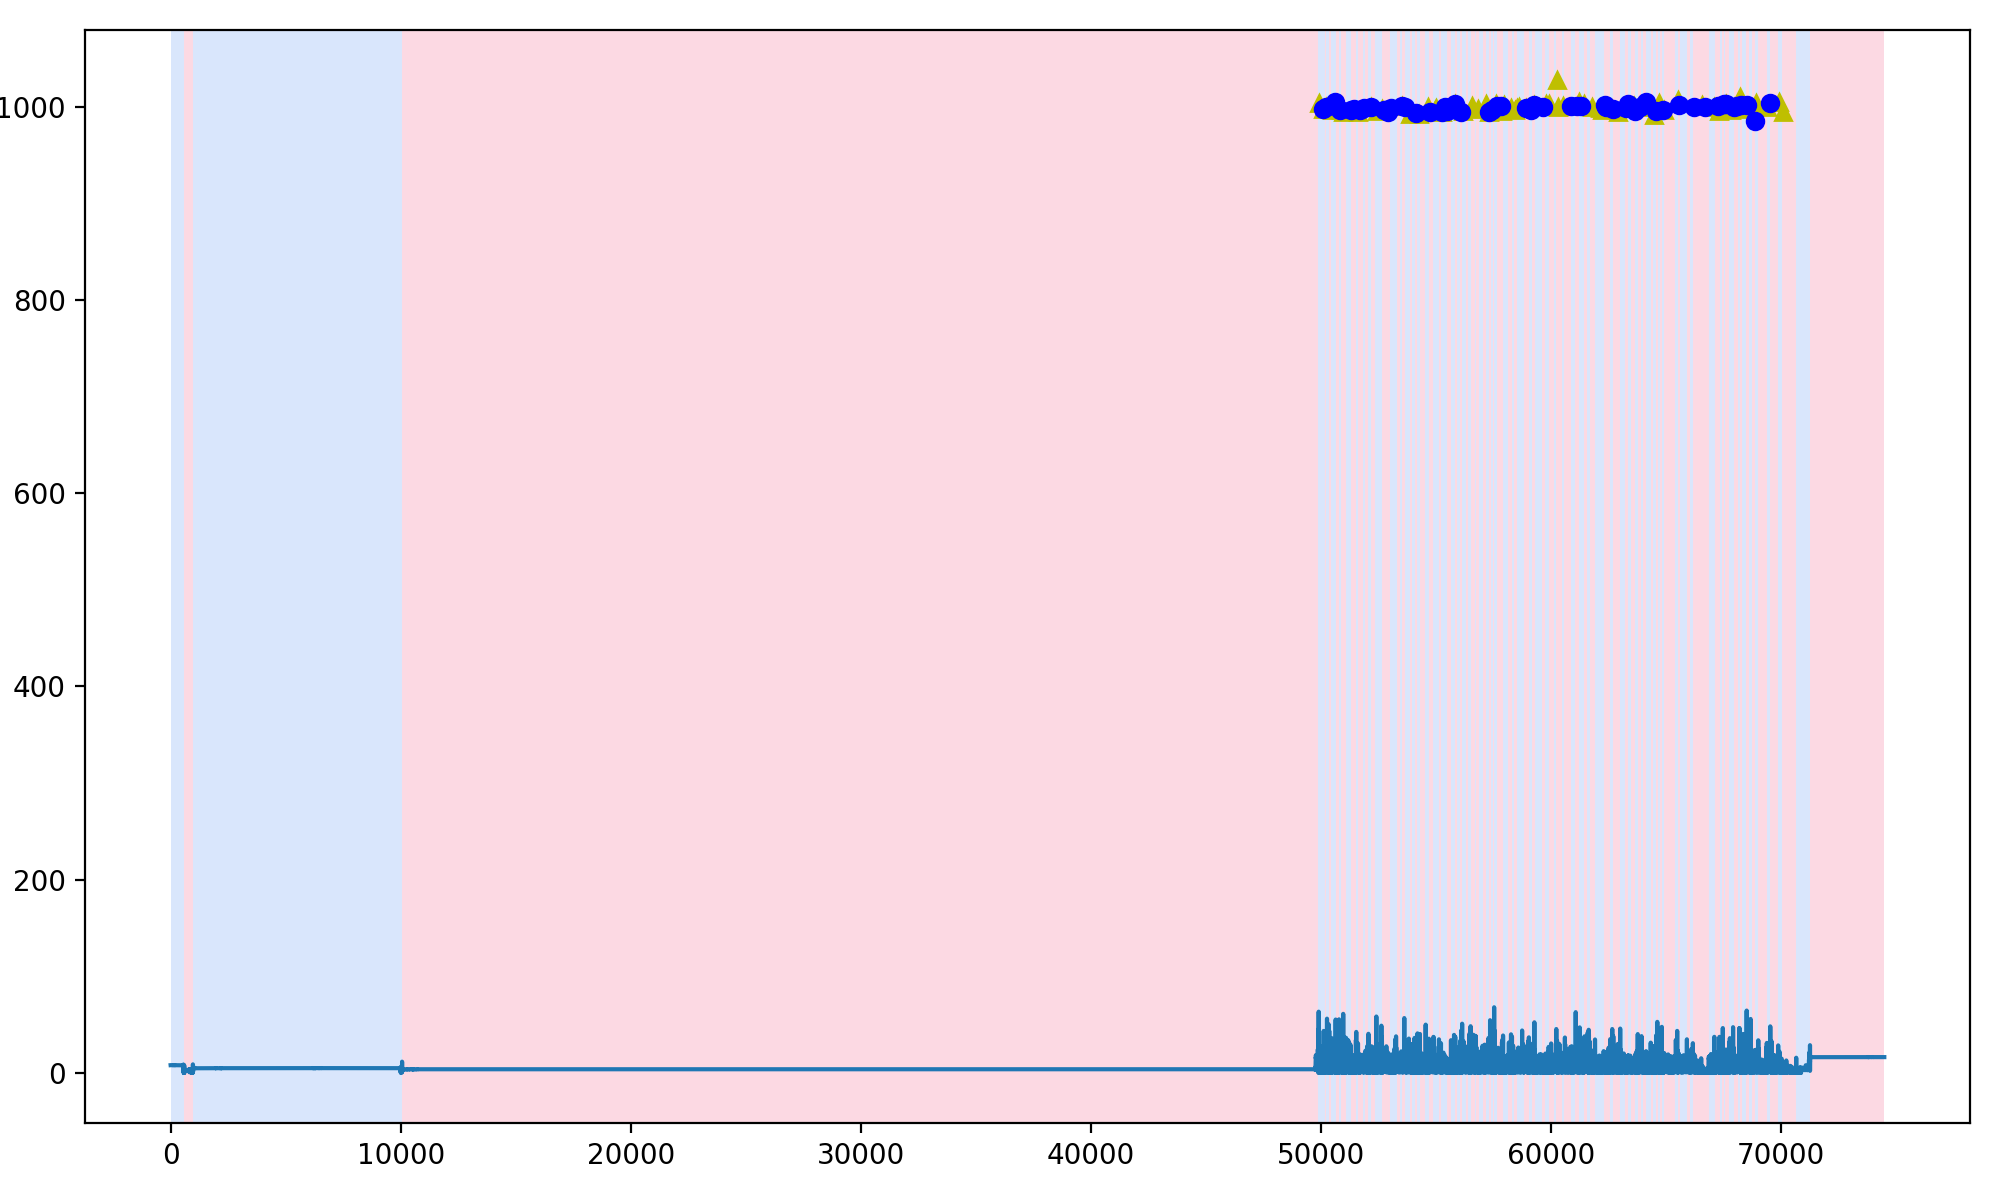

126


In [98]:
"""Plot the observed changepoints together with the calculated changepoints"""

M09_1507_bkps = window_cpd(M09_1507[:,[2]],"ar",100,25,1,1)
for i in range(len(vcp_idx)):
    plt.plot(vcp_idx[i],signal[:,[1]][vcp_idx[i]],marker = "^", color = "y", label = "Hydrologic features")

for i in range(len(vcp_meanders_idx)):
    plt.plot(vcp_meanders_idx[i],signal[:,[1]][vcp_meanders_idx[i]],marker = "o", color = "b",label = "Meanders")

plt.show()




15072021/M15/M150715161817
15072021/M15/M150715161817


<IPython.core.display.Javascript object>


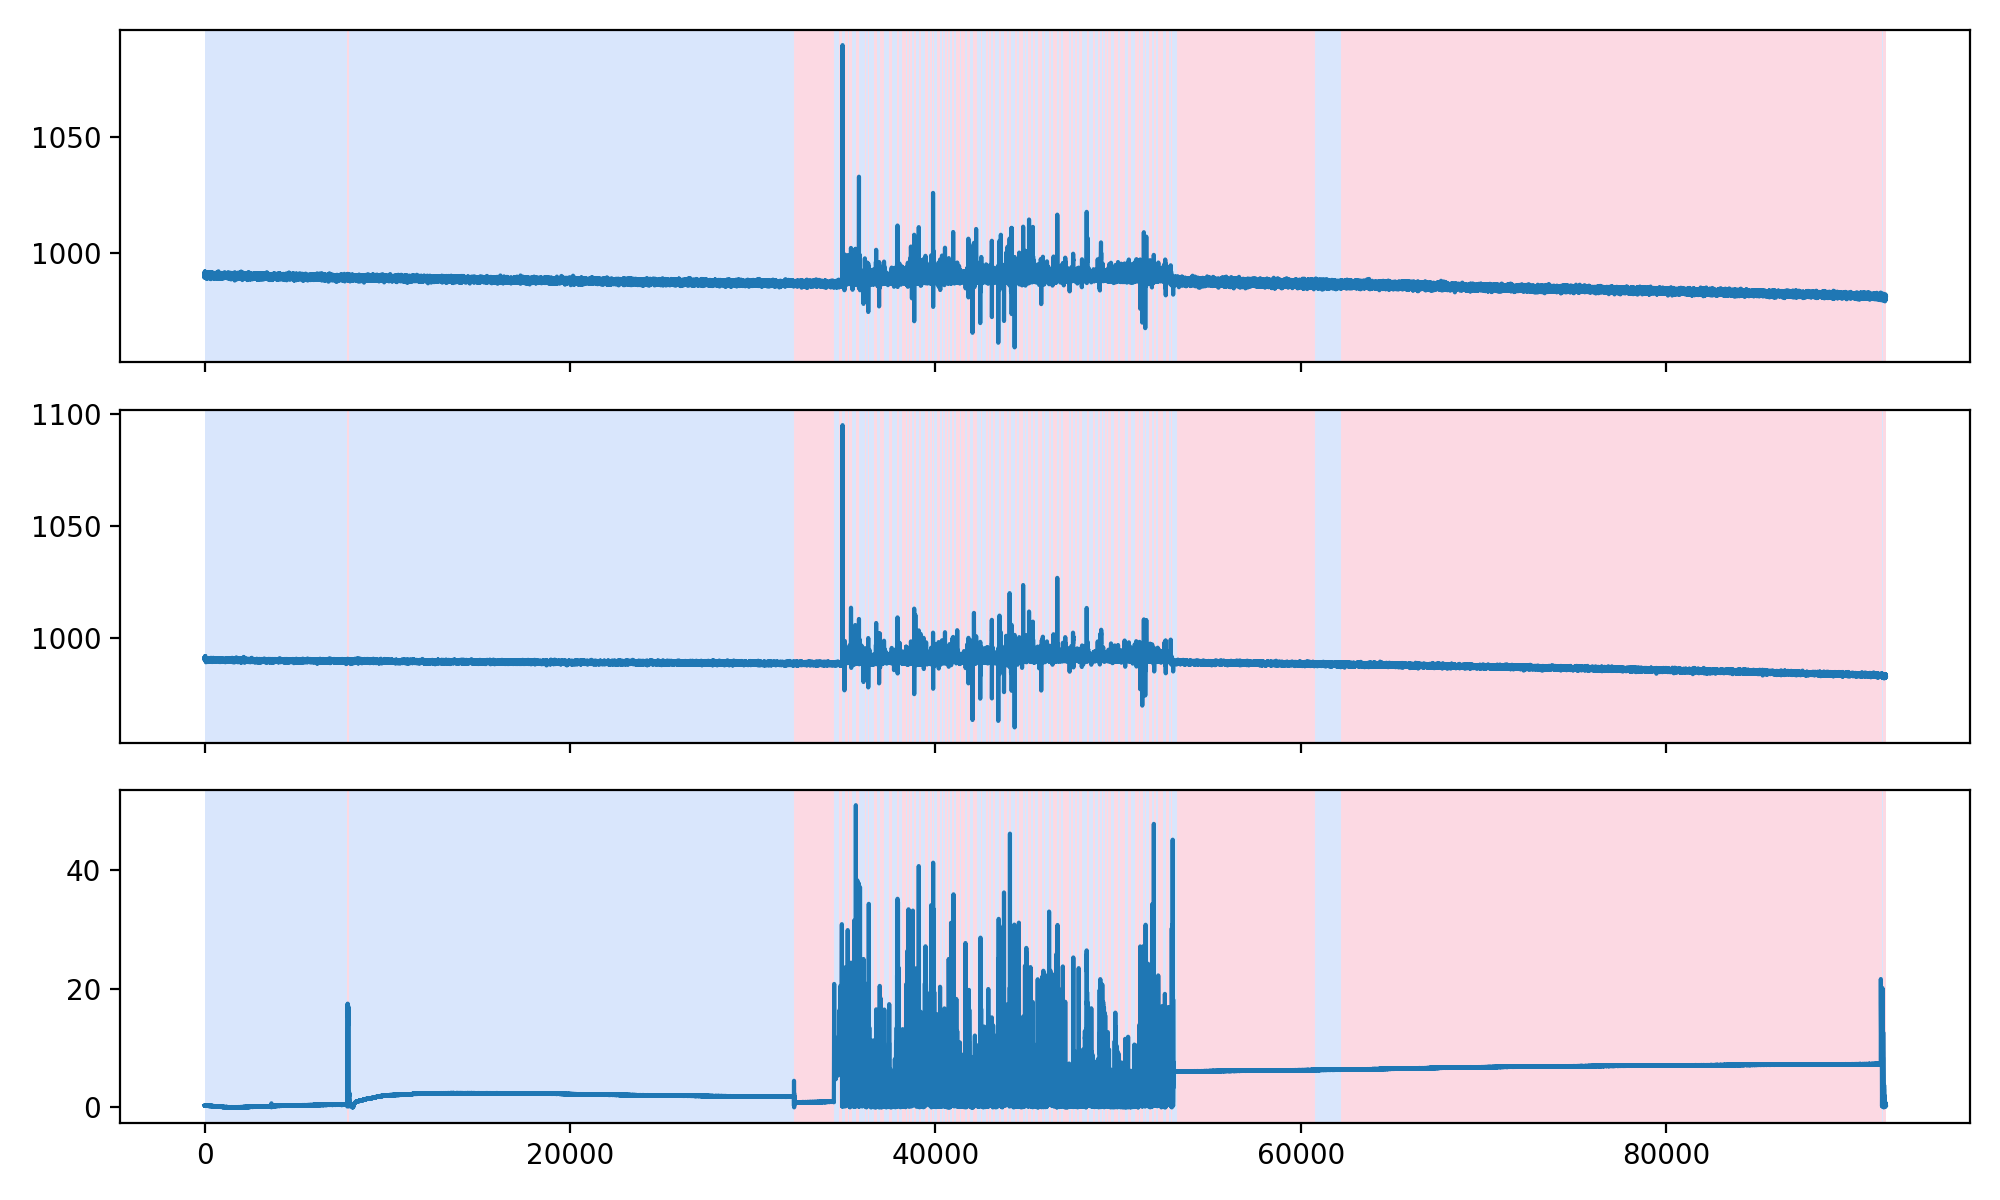

140


In [99]:
M24_1707_bkps = window_cpd(M24_1707[:,[0,1,2]],"ar",100,10,3,1)





## Kernel CPD

https://centre-borelli.github.io/ruptures-docs/examples/kernel-cpd-performance-comparison/

In [ ]:
def kernel_cpd(signal,kernel,min_size,penalty):
    algo_c = rpt.KernelCPD(kernel=kernel, min_size=500).fit(signal)  # written in C, same class as before
    result = algo_c.predict(pen=penalty)
    fig, ax_array = rpt.display(signal, result)

kernel = "linear"
dummy = kernel_cpd(signal[:,[0,1]],kernel,100,1000)

## Binseg
https://centre-borelli.github.io/ruptures-docs/user-guide/detection/binseg/

Much faster than kernel

In [ ]:

def BinSeg(signal,model,jump,dim,sigma):
    # change point detection

    algo = rpt.Binseg(model=model, jump=jump).fit(signal)
    my_bkps = algo.predict(pen=np.log(n) * 1 * sigma ** 2)

    # show results
    rpt.show.display(signal, my_bkps, figsize=(10, 6))
    plt.show()
    
model = "ar"# "l1", "rbf", "linear", "normal", "ar"
sigma = 2

dummy = BinSeg(signal,model,100,3,sigma)

# BottomUp

Looks pretty much the same as binseng
https://centre-borelli.github.io/ruptures-docs/user-guide/detection/bottomup/

In [ ]:
def BottomUp(signal,model,jump,dim,sigma):
    # change point detection
    algo = rpt.BottomUp(model=model, jump=jump).fit(signal)
    my_bkps = algo.predict(pen=np.log(n) * dim * sigma ** 2)

    # show results
    rpt.show.display(signal, my_bkps, figsize=(10, 6))
    plt.show()
    return my_bkps

model = "l2"#"l2"  # "l1", "rbf", "linear", "normal", "ar"
sigma = 2

dummy = BottomUp(signal,model,1000,3,sigma)
